# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd
# Librerias para graficar
from matplotlib import pyplot
# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline



## 1 Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir si un estudiante será admitido en una universidad. Suponga que es el administrador de un departamento universitario y desea determinar las posibilidades de admisión de cada solicitante en función de sus resultados en dos exámenes. Tiene datos históricos de solicitantes anteriores que puede usar como un conjunto de capacitación para la regresión logística. Para cada ejemplo de capacitación, se tiene las calificaciones del solicitante en dos exámenes y la decisión de admisión. Su tarea es crear un modelo de clasificación que calcule la probabilidad de admisión de un solicitante en función de los puntajes de esos dos exámenes.

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [156]:
# Leer el archivo CSV por pandas y tomar 30000 datos
data = pd.read_csv('/content/drive/MyDrive/SIS420_IA/lab 2 cuadernillo y dataset/dataset_health_2022_.csv', usecols=[1, 2, 3, 4, 6, 7, 9, 11, 12, 15, 18, 19, 24, 27, 30 ], nrows=30000)

# Mover la columna 'GeneralHealth' a la posición final
cols = data.columns.tolist()
cols.append(cols.pop(cols.index('GeneralHealth')))
data = data[cols]

# Columnas con valores 'Yes' y 'No'
yes_no_columns = ['Sex','PhysicalActivities', 'HadHeartAttack', 'HadStroke', 'HadAsthma',
                  'HadDepressiveDisorder', 'HadDiabetes', 'DeafOrHardOfHearing',
                  'DifficultyErrands', 'ChestScan']

# Función para mapear 'Yes' a 1 y 'No' a 0 ,,, Male=1 , Female=0 [0 1 'Yes, but only during pregnancy (female)'
def map_yes_no(value):
    if value == 'Yes' or value == 'Male' or value == 'Yes, but only during pregnancy (female)':
        return 1
    elif value == 'No' or value == 'Female' or value == 'No, pre-diabetes or borderline diabetes':
        return 0
    else:
        return value

def map_health_status(health_status):
    if health_status in ['Excellent', 'Very good', 'Good']:
        return 1
    else:
        return 0

# Aplicar la transformación a las columnas seleccionadas
for col in yes_no_columns:
    data[col] = data[col].apply(map_yes_no)
# Aplicar la función a la columna 'GeneralHealth'
data['GeneralHealth'] = data['GeneralHealth'].apply(map_health_status)


# Verificar que ya no hay valores NaN en el DataFrame
print("Cantidad de NaN por columna después de llenar los datos faltantes:")
print(data.isna().sum())

data.info()

Cantidad de NaN por columna después de llenar los datos faltantes:
Sex                      0
PhysicalHealthDays       0
MentalHealthDays         0
PhysicalActivities       0
SleepHours               0
HadHeartAttack           0
HadStroke                0
HadAsthma                0
HadDepressiveDisorder    0
HadDiabetes              0
DeafOrHardOfHearing      0
DifficultyErrands        0
ChestScan                0
HeightInMeters           0
GeneralHealth            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    30000 non-null  int64  
 1   PhysicalHealthDays     30000 non-null  float64
 2   MentalHealthDays       30000 non-null  float64
 3   PhysicalActivities     30000 non-null  int64  
 4   SleepHours             30000 non-null  float64
 5   HadHeartAttack         30000 non-null

In [157]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 21753 to 23654
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    24000 non-null  int64  
 1   PhysicalHealthDays     24000 non-null  float64
 2   MentalHealthDays       24000 non-null  float64
 3   PhysicalActivities     24000 non-null  int64  
 4   SleepHours             24000 non-null  float64
 5   HadHeartAttack         24000 non-null  int64  
 6   HadStroke              24000 non-null  int64  
 7   HadAsthma              24000 non-null  int64  
 8   HadDepressiveDisorder  24000 non-null  int64  
 9   HadDiabetes            24000 non-null  int64  
 10  DeafOrHardOfHearing    24000 non-null  int64  
 11  DifficultyErrands      24000 non-null  int64  
 12  ChestScan              24000 non-null  int64  
 13  HeightInMeters         24000 non-null  float64
 14  GeneralHealth          24000 non-null  int64  
dty

Se llama a la función implementada para mostrar los datos cargados:

In [158]:
print(data['HadDiabetes'].unique())


[0 1]


In [159]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [160]:
train_data.to_csv("train.csv", index=False)
test_data.to_csv("test.csv", index=False)

In [161]:
#Carga de dataset
data = pd.read_csv('/content/train.csv')
data_test = pd.read_csv('/content/test.csv')


In [162]:
X = data.iloc[:, :14]
y = data.iloc[:, 14]
m = y.size

X_test = data_test.iloc[:,:14]
y_test = data_test.iloc[:,14]
m_test = y_test.size
y_test

0       1
1       1
2       1
3       1
4       1
       ..
5995    1
5996    1
5997    1
5998    1
5999    1
Name: GeneralHealth, Length: 6000, dtype: int64

In [163]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [164]:
X_norm, mu, sigma= featureNormalize(X_train)

In [165]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

La funcion de costo en una regresión logistica es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Si bien este gradiente parece idéntico al gradiente de regresión lineal, la fórmula es diferente porque la regresión lineal y logística tienen diferentes definiciones de $h_\theta(x)$.
<a id="costFunction"></a>

In [166]:
X_norm

,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadStroke,HadAsthma,HadDepressiveDisorder,HadDiabetes,DeafOrHardOfHearing,DifficultyErrands,ChestScan,HeightInMeters
0,1.024637,-0.505481,-0.165042,0.514285,-0.036050,-0.239309,-0.210681,-0.433184,-0.514803,-0.405705,-0.293881,-0.271178,-0.849508,1.643429
1,-0.975956,-0.505481,0.080526,0.514285,-0.036050,-0.239309,-0.210681,-0.433184,-0.514803,-0.405705,-0.293881,-0.271178,-0.849508,-1.002005
2,1.024637,0.078530,0.080526,0.514285,0.635693,-0.239309,-0.210681,-0.433184,-0.514803,-0.405705,-0.293881,-0.271178,1.177152,1.359989
3,1.024637,-0.505481,-0.533395,0.514285,-0.036050,-0.239309,-0.210681,-0.433184,-0.514803,-0.405705,-0.293881,-0.271178,-0.849508,1.359989
4,-0.975956,-0.505481,-0.410611,0.514285,-0.036050,-0.239309,-0.210681,-0.433184,-0.514803,-0.405705,-0.293881,-0.271178,-0.849508,0.698631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.024637,-0.505481,-0.533395,0.514285,-0.036050,4.178701,-0.210681,-0.433184,-0.514803,-0.405705,-0.293881,-0.271178,-0.849508,-0.246167
5996,-0.975956,-0.038272,3.150132,0.514285,-1.379537,-0.239309,-0.210681,-0.433184,1.942491,-0.405705,-0.293881,-0.271178,-0.849508,-1.002005
5997,-0.975956,-0.505481,3.150132,-1.944448,-3.394767,-0.239309,-0.210681,-0.433184,-0.514803,-0.405705,-0.293881,-0.271178,-0.849508,-1.474404
5998,1.024637,-0.155074,-0.165042,0.514285,-0.707794,-0.239309,-0.210681,-0.433184,-0.514803,2.464847,-0.293881,3.687620,1.177152,0.226232


In [167]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [168]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [169]:
X

array([[ 1.  ,  0.  , 30.  , ...,  1.  ,  1.  ,  1.55],
       [ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.6 ],
       [ 1.  ,  1.  ,  5.  , ...,  0.  ,  1.  ,  1.83],
       ...,
       [ 1.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  1.78],
       [ 1.  ,  0.  , 10.  , ...,  0.  ,  0.  ,  1.6 ],
       [ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.73]])

theta calculado por el descenso por el gradiente: [ 5.17346581e-02  2.48079414e-02 -1.05661650e-01 -2.58213218e-02
  6.48434016e-02  3.07292950e-01 -6.33940905e-03 -5.31192255e-03
  1.58505447e-03 -2.39513177e-03 -1.42458259e-02 -3.81320708e-03
 -1.14097545e-02  1.36172416e-04  8.93399127e-02]
0.9256907042654885


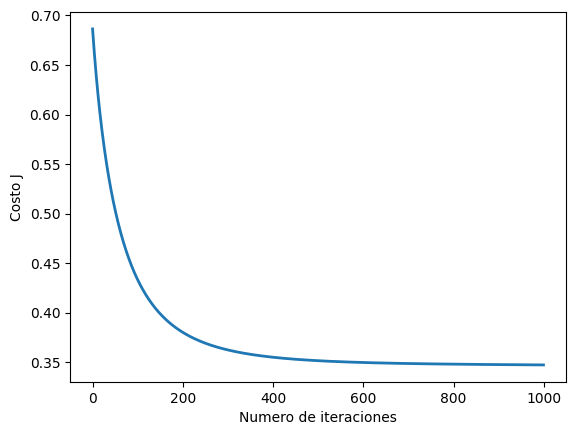

In [170]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(15)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 1, 0.4, 1.0, 1, 7.5 , 0 , 1,  0 ,1 ,0 , 0, 0, 1 , 1.7]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(aprueba)

In [171]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [172]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[-0.33729167 -0.17170833  0.1570625  -0.66902083 -0.305625   -2.399625
 -0.00433333 -0.00275    -0.03914583 -0.04222917 -0.016875   -0.01520833
  0.005875   -0.10739583 -0.57798083]
Gradiente en theta inicial (zeros):
	[-0.3373, -0.1717, 0.1571]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [173]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-24, 0.2, 0.2 , 6,3,2,7,4,2,5,83,12,0.42,0.6,0.2])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[-24.     0.2    0.2    6.     3.     2.     7.     4.     2.     5.
  83.    12.     0.42   0.6    0.2 ]
Costo en theta prueba: nan
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[-0.274, -0.159, 1.562]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


<ipython-input-171-e3041c0335d8>:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


#### 1.2.3 Parámetros de aprendizaje usando `scipy.optimize`

En el codigo anterior se encontró los parámetros óptimos de un modelo de regresión lineal al implementar el descenso de gradiente. Se implemento una función de costo y se calculó su gradiente, utilizando el algoritmo del descenso por el gradiente.

En lugar de realizar los pasos del descenso por el gradiente, se utilizará el [módulo `scipy.optimize`] (https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy es una biblioteca de computación numérica para `python`. Proporciona un módulo de optimización para la búsqueda y minimización de raíces. A partir de `scipy 1.0`, la función` scipy.optimize.minimize` es el método a utilizar para problemas de optimización (tanto restringidos como no restringidos).

For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, you are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to `optimize.minimize` the following inputs:

Para la regresión logística, se desea optimizar la función de costo $J(\theta)$ con los parámetros $\theta$.
Concretamente, se va a utilizar `optimize.minimize` para encontrar los mejores parámetros $\theta$ para la función de costo de regresión logística, dado un dataset fijo (de valores X e y). Se pasara a `optimize.minimize` las siguientes entradas:

- `costFunction`: Una función de costo que, cuando se le da el dataset de entrenamiento y un $\theta$ particular, calcula el costo de regresión logística y el gradiente con respecto a $\theta$ para el dataset(X, y). Es importante tener en cuenta que solo se pasa el nombre de la función sin el paréntesis. Esto indica que solo proporcionamos una referencia a esta función y no evaluamos el resultado de esta función.
- `initial_theta`: Los valores iniciales de los parametros que se tratan de optimizar.
- `(X, y)`: Estos son argumentos adicionales a la funcion de costo.
- `jac`: Indicación si la función de costo devuelve el jacobiano (gradiente) junto con el valor de costo. (True)
- `method`: Método / algoritmo de optimización a utilizar
- `options`: Opciones adicionales que pueden ser específicas del método de optimización específico. Solo se indica al algoritmo el número máximo de iteraciones antes de que termine.

Si se ha completado la `costFunction` correctamente,`optimize.minimize` convergerá en los parámetros de optimización correctos y devolverá los valores finales del costo y $\theta$ en un objeto de clase.

Al usar `optimize.minimize`, no se tuvo que escribir ningún bucle ni establecer una tasa de aprendizaje como se hizo para el descenso de gradientes. Todo esto se hace mediante `optimize.minimize`: solo se necesita proporcionar una función que calcule el costo y el gradiente.

A continuación, se tiene el código para llamar a `optimize.minimize` con los argumentos correctos.

In [174]:
X_norm_test = (X_test- mu) / sigma
m_test= len(X_test)

In [175]:
X_test_1 = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)


<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un estudiante en particular será admitido. Para un estudiante con una puntuación en el Examen 1 de 45 y una puntuación en el Examen 2 de 85, debe esperar ver una probabilidad de admisión de 0,776. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento.

In [176]:
y_predicha =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_1:
    y_predicha.append(sigmoid(np.dot(dato, theta)))

# Convertimos la lista a un array unidimensional
y_predicha = np.array(y_predicha)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral = (y_predicha >= 0.5).astype(int)

print(y_train.shape)

(6000, 14)


Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [177]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test[0]) * 100))

Precisión de entrenamiento: 61.80 %
